# EDA on Heart Disease Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Dataset

In [2]:
df = pd.read_csv("heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Checking the Null Values

In [4]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# Object Features

In [5]:
Object_feautres = [features for features in df.columns if df[features].dtype == 'O']
Object_feautres

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Numeric Features

In [6]:
Numeric_feautres = [features for features in df.columns if df[features].dtype != 'O']
Numeric_feautres

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# 7-Point Summary

In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# Univariate Ananlysis For the Numerical Features

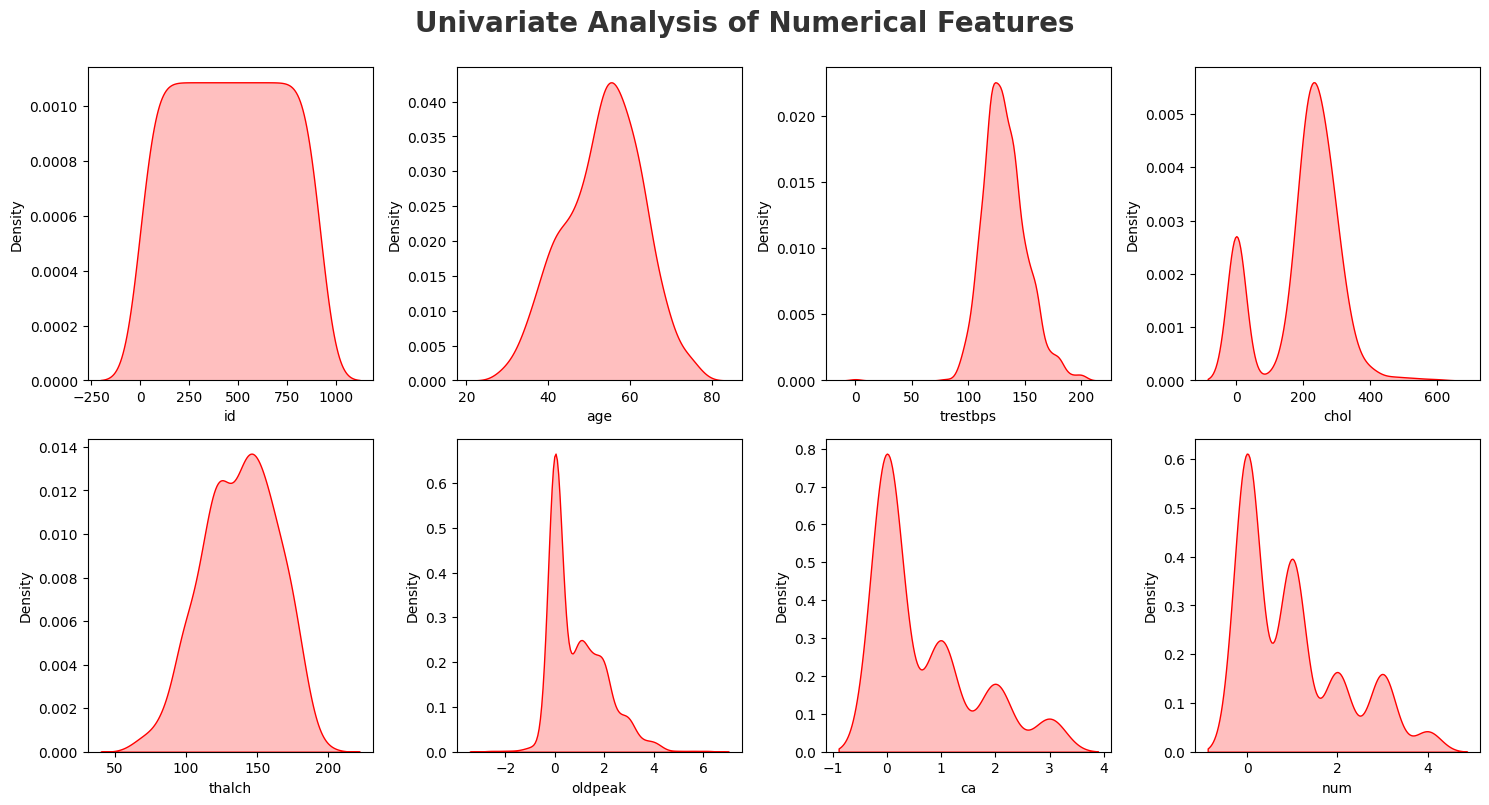

In [11]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features' , fontsize = 20 , fontweight = 'bold' , alpha = 0.8 , y = 1.)

for i in range(len(Numeric_feautres)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(x = df[Numeric_feautres[i]] , shade = True , color = 'r')
    plt.xlabel(Numeric_feautres[i])
    plt.tight_layout()

In [ ]:
df['num'] = np.where(df['num'].between(1,4),1,0)

# Plotting Categorical Features

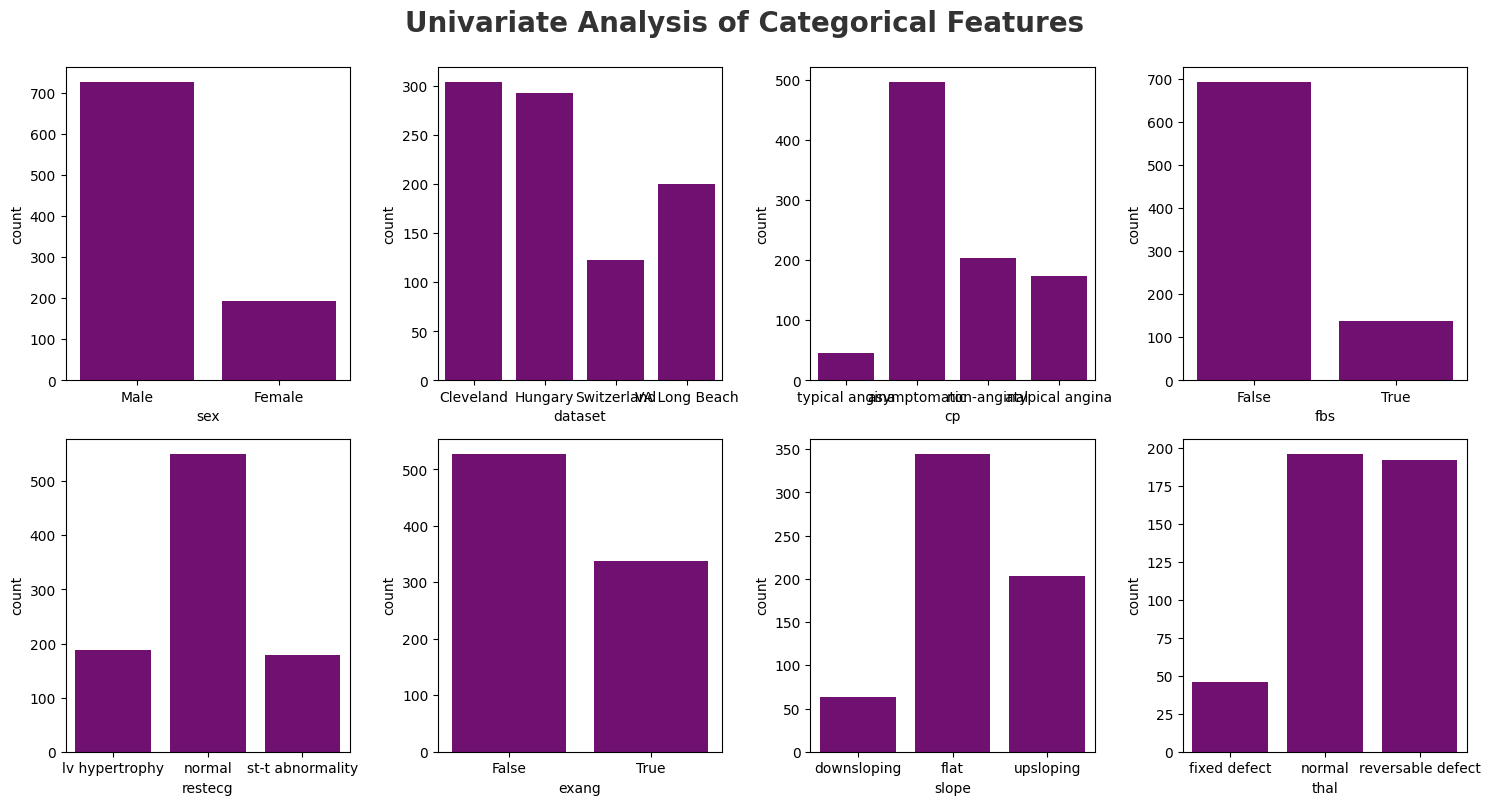

In [25]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features' , fontsize = 20 , fontweight = 'bold' , alpha = 0.8 , y = 1.)

for i in range(len(Object_feautres)):
    plt.subplot(4,4,i+1)
    sns.countplot(data = df , x = Object_feautres[i] , color='purple')
    plt.xlabel(Object_feautres[i])
    plt.tight_layout()

# Target Feature EDA

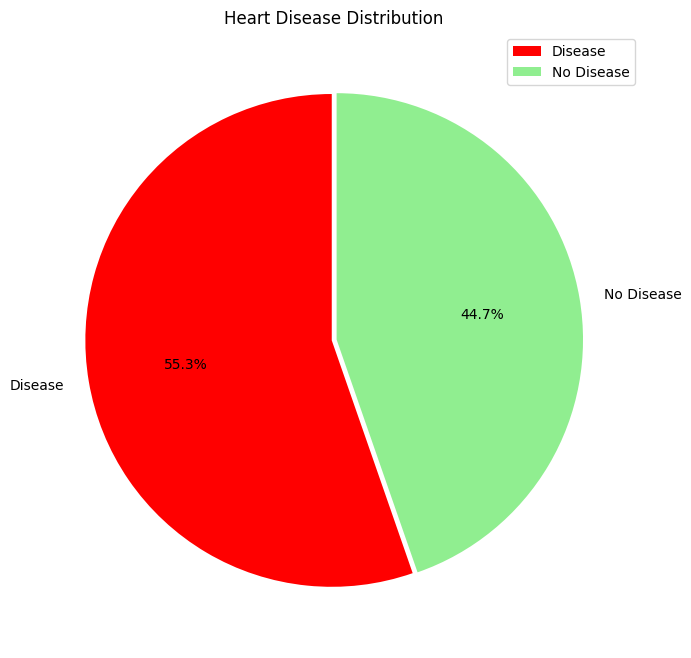

In [ ]:
df['num_label'] = df['num'].map({0: 'No Disease', 1: 'Disease'})


plt.figure(figsize=(8,8))
df['num_label'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['red', 'lightgreen'],explode=[0.01, 0.01])

plt.ylabel("")
plt.title("Heart Disease Distribution")
plt.legend()
plt.show()


# Observation
- Does heart disease increase after a certain age?

age_group
20-29     0.000000
30-39    34.210526
40-49    40.094340
50-59    56.800000
60-69    73.423423
70-79    70.967742
Name: num, dtype: float64


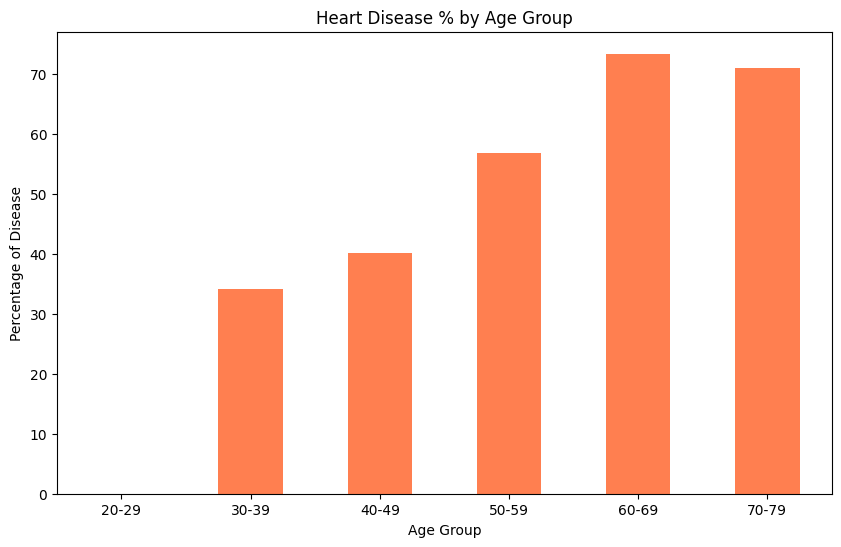

In [62]:
# Create age bins
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate disease rate in each age group
age_disease_rate = df.groupby('age_group')['num'].mean() * 100

print(age_disease_rate)

# Plot
plt.figure(figsize=(10,6))
age_disease_rate.plot(kind='bar', color='coral')
plt.title('Heart Disease % by Age Group')
plt.ylabel('Percentage of Disease')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()
